In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
import os

import functions.eddy_feedback as ef
import functions.data_wrangling as data

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

In [2]:
path_dir = '/home/links/ct715/data_storage/PAMIP/processed_monthly/efp_pd_non-regridded'

# extract model names
files = os.listdir(path_dir)
models = [os.path.basename(f).split('_')[0] for f in files]
models.sort()

models.remove('CESM1-WACCM-SC')
models.remove('E3SMv1')

# Create dictionary containing each model name and dataset
pamip_efp_nh = {}
pamip_efp_sh = {}
for model in models:
    # create file path by joining directory and model name
    file_path = os.path.join(path_dir, f'{model}_*.nc')
    # open xarray dataset
    ds = xr.open_mfdataset(file_path, parallel=True, chunks={'time':31})
    # Add dataset to dictionary with required model name
    
    efp_nh = ef.calculate_efp(ds, data_type='pamip')
    efp_sh = ef.calculate_efp(ds, data_type='pamip', calc_south_hemis=True)
    
    pamip_efp_nh[model] = efp_nh
    pamip_efp_sh[model] = efp_sh

In [3]:
print(pamip_efp_nh.values())

dict_values([np.float64(0.3693), np.float64(0.2421), np.float64(0.4256), np.float64(0.2945), np.float64(0.0139), np.float64(0.2354), np.float32(0.273), np.float64(0.3137), np.float32(0.2719), np.float64(0.2213), np.float64(0.3238), np.float64(0.3279), np.float64(0.2302)])


In [4]:
# Create DataFrame
pd_data = {'Model': pamip_efp_nh.keys(), 'NH Feedback (DJF)': pamip_efp_nh.values(), 'SH Feedback (JAS)': pamip_efp_sh.values()}
df = pd.DataFrame(pd_data)

df = df.drop([4])
df

,Model,NH Feedback (DJF),SH Feedback (JAS)
0,CESM2,0.3693,0.3419
1,CNRM-CM6-1,0.2421,0.2082
2,CanESM5,0.4256,0.4618
3,EC-EARTH3,0.2945,0.3135
5,FGOALS-f3-L,0.2354,0.1274
6,HadGEM3-GC31-LL,0.2730,0.2951
7,HadGEM3-GC31-MM,0.3137,0.3002
8,IPSL-CM6A-LR,0.2719,0.1959
9,MIROC6,0.2213,0.3253
10,NorESM2-LM,0.3238,0.3754


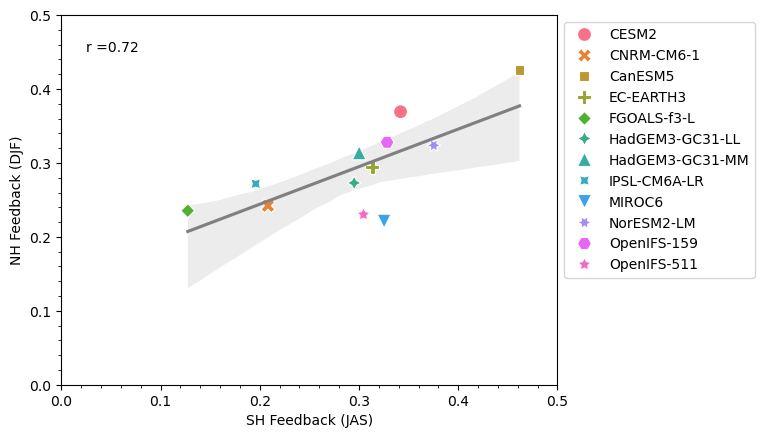

In [5]:
sns.regplot(data=df, x='SH Feedback (JAS)', y='NH Feedback (DJF)', scatter_kws={'color': 'white'}, line_kws={"color": "gray"})
sns.scatterplot(data=df, x='SH Feedback (JAS)', y='NH Feedback (DJF)', hue='Model', style='Model', s=100)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=df['NH Feedback (DJF)'], y=df['SH Feedback (JAS)'])
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r), transform=ax.transAxes)

plt.xlim([0,0.5])
plt.ylim([0,0.5])

plt.minorticks_on()
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## Isca

In [6]:
isca = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/isca_data/realistic_V2_uvt_ubar_ep-both.nc',
                         parallel=True, chunks={'time':30})
model_isca = 'Realistic-Isca'
isca

OSError: no files to open

In [ ]:
efp_isca_north = ef.calculate_efp(isca, reanalysis_slice=False)
efp_isca_south = ef.calculate_efp(isca, calc_south_hemis=True, reanalysis_slice=False)

In [ ]:
print(efp_isca_north)
print(efp_isca_south)

0.2776
0.3028


In [ ]:
# Data
model_list = [model_can, model_cesm2, model_cnrm, model_e3sm, model_ecearth, model_fgoals, 
              model_hadll, model_hadmm, model_ipsl, model_miroc, model_nor, 
              model_t159, model_t511, model_cesm1, model_isca]

efp_djf = [can_efp, cesm2_efp, cnrm_efp, e3sm_efp, ecearth_efp, fgoals_efp,
           hadll_efp, hadmm_efp, ipsl_efp, miroc_efp, nor_efp, t159_efp,
           t511_efp, cesm1_efp, efp_isca_north]
efp_jas = [can_efp_south, cesm2_efp_south, cnrm_efp_south, e3sm_efp_south, ecearth_efp_south, fgoals_efp_south,
           hadll_efp_south, hadmm_efp_south, ipsl_efp_south, miroc_efp_south, nor_efp_south, t159_efp_south,
           t511_efp_south, cesm1_efp_south, efp_isca_south]

# Create DataFrame
pd_data = {'Model': model_list, 'NH Feedback (DJF)': efp_djf, 'SH Feedback (JAS)': efp_jas}
df = pd.DataFrame(pd_data)

df

,Model,NH Feedback (DJF),SH Feedback (JAS)
0,CanESM5,0.4255,0.4634
1,CESM2,0.3978,0.3548
2,CNRM-CM6-1,0.2733,0.2386
3,E3SMv1,0.0554,0.0594
4,EC-EARTH3,0.3365,0.3480
5,FGOALS-f3-L,0.2621,0.1420
6,HadGEM3-GC31-LL,0.3018,0.3276
7,HadGEM3-GC31-MM,0.3616,0.3474
8,IPSL-CM6A-LR,0.3099,0.2262
9,MIROC6,0.2469,0.3547


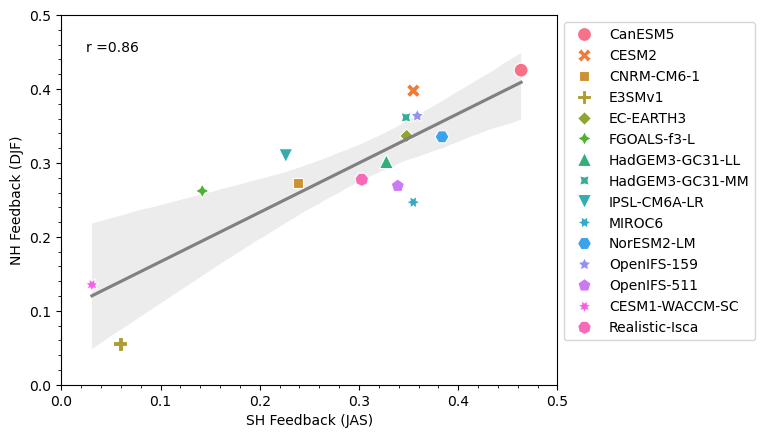

In [ ]:
sns.regplot(data=df, x='SH Feedback (JAS)', y='NH Feedback (DJF)', scatter_kws={'color': 'white'}, line_kws={"color": "gray"})
sns.scatterplot(data=df, x='SH Feedback (JAS)', y='NH Feedback (DJF)', hue='Model', style='Model', s=100)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=efp_jas, y=efp_djf)
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r), transform=ax.transAxes)

plt.xlim([0,0.5])
plt.ylim([0,0.5])

plt.minorticks_on()
plt.legend(bbox_to_anchor=(1,1))
plt.show()